<a href="https://colab.research.google.com/github/MichaelCui233/mas648-machine-learning-for-data-analytics/blob/main/Copy_of_Restaurant_revenue_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

##Objective

We hope to find a fit model that could help predict the revenue of other restaurants.

##Data Description
There are 137 restaurants in the dataset. The data column includes open date, location, city type, and three categories of obfuscated data: Demographic data, Real estate data, and Commercial data. The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. 

### **Data fields**

* Id : Restaurant id.
* Open Date : opening date for a restaurant
* City : City that the restaurant is in. Note that there are unicode in the names. 
* City Group: Type of the city. Big cities, or Other. 
* Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru
* P1, P2 - P37: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
* Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

#Data Exploration

##Import packages and data

In [ ]:
# Basic data processing packages
import pandas as pd
import numpy as np
import datetime
import math

# Plot packages
import seaborn as sns
import matplotlib.pyplot as plt


# Machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.utils.fixes import linspace
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from google.colab import drive
from sklearn.svm import SVR

In [ ]:
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/RestaurantRevenue.csv')

Mounted at /content/gdrive


##Data visualization and preprocessing

In [ ]:
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [ ]:
df['Open Date'] = pd.to_datetime(df['Open Date'])

In [ ]:
numerical_features = df.select_dtypes([np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude = [np.number,np.datetime64]).columns.tolist()

###Numerical data distribution

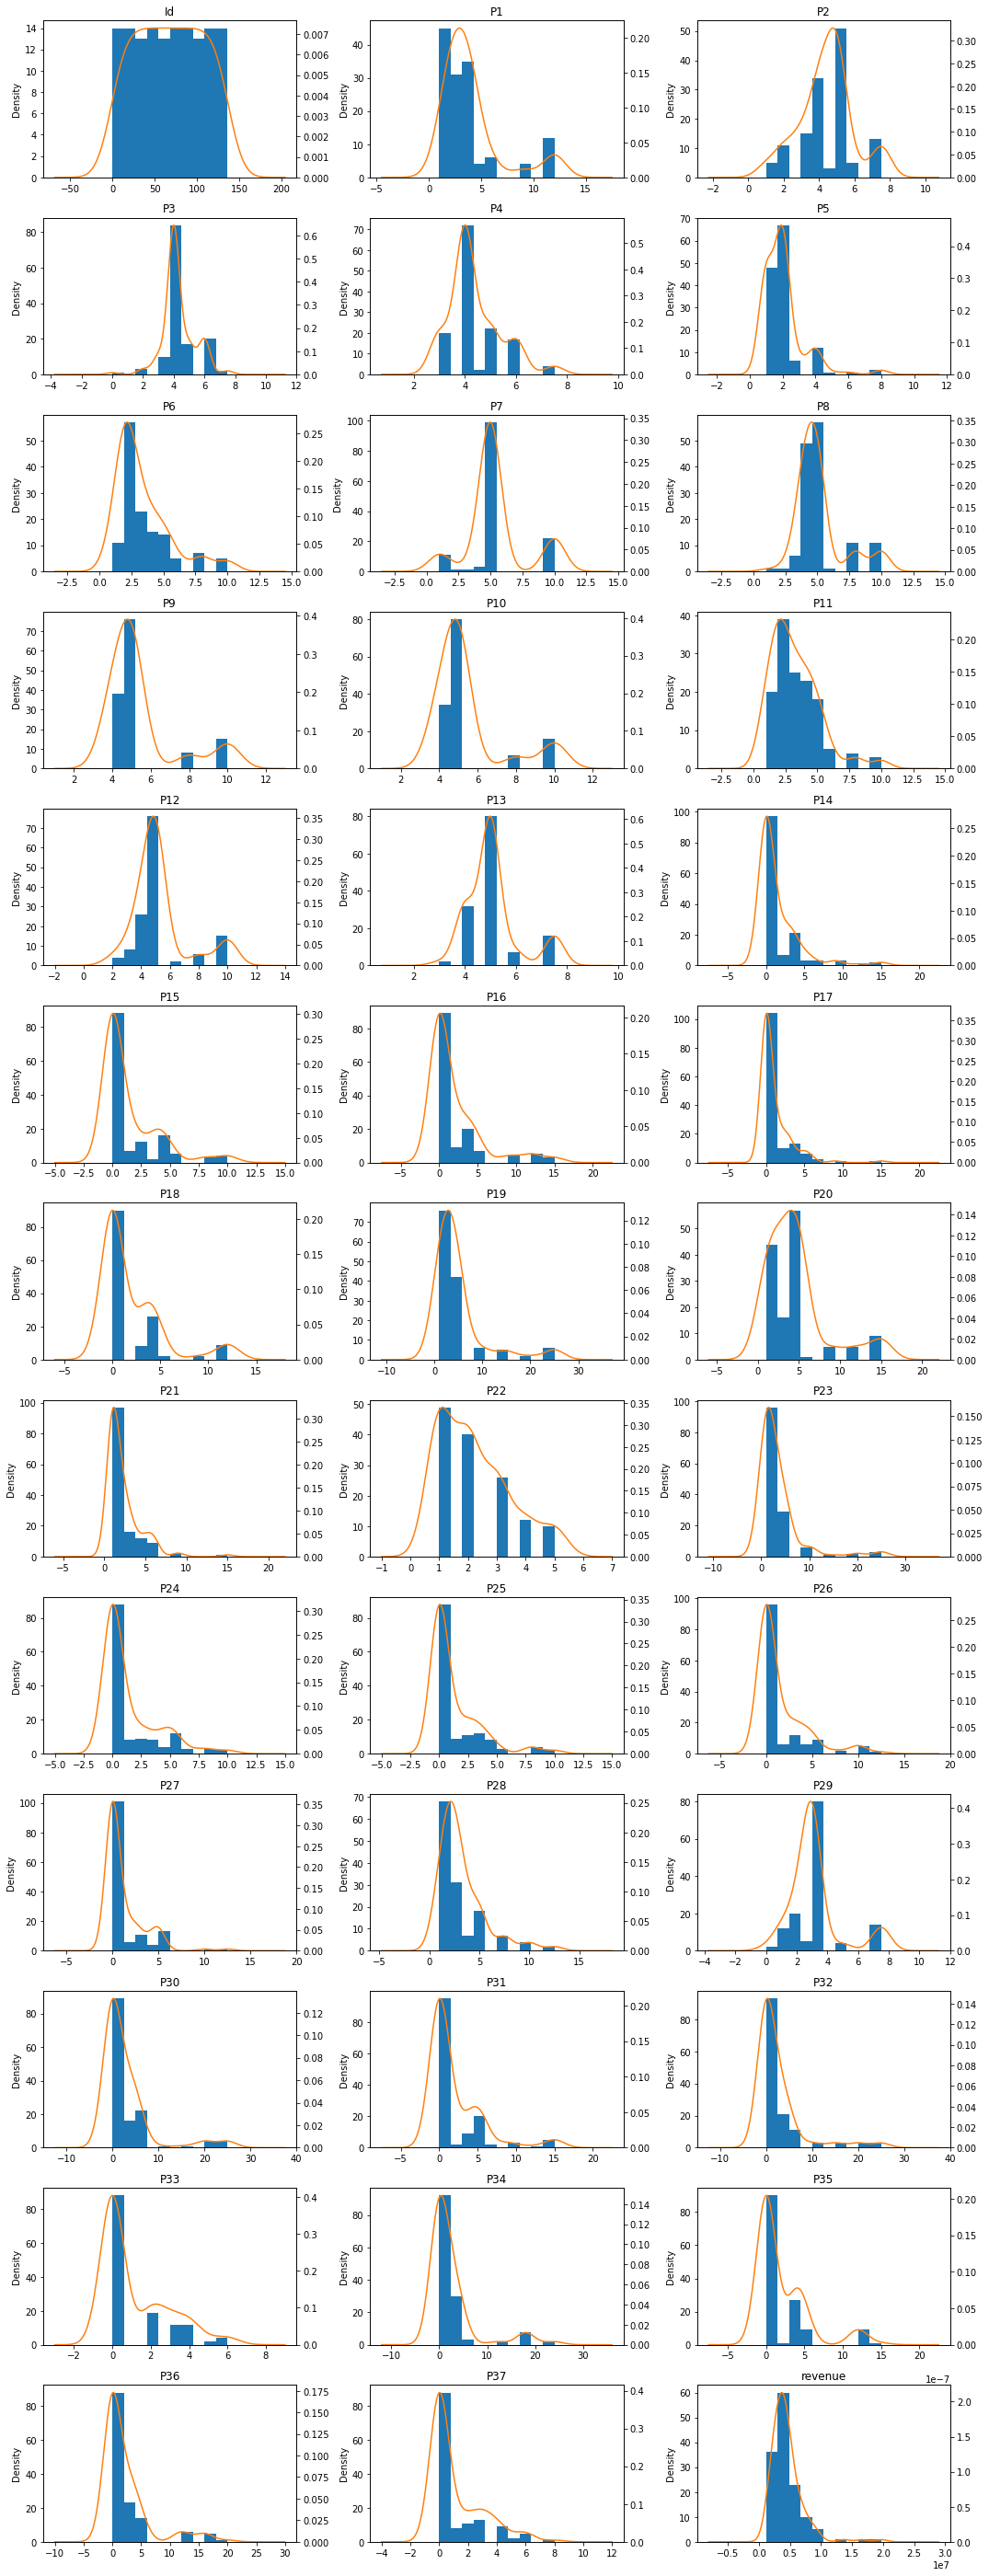

In [ ]:
k = len(df[numerical_features].columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(df[numerical_features].iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)

fig.tight_layout()

It seems like that all the variables belong to the skewed distribution and even in some variables like P14-18, 24-27 and 30-37, the zero accounts for the biggest part, which probably indicates kind of missing values or other entry problems.

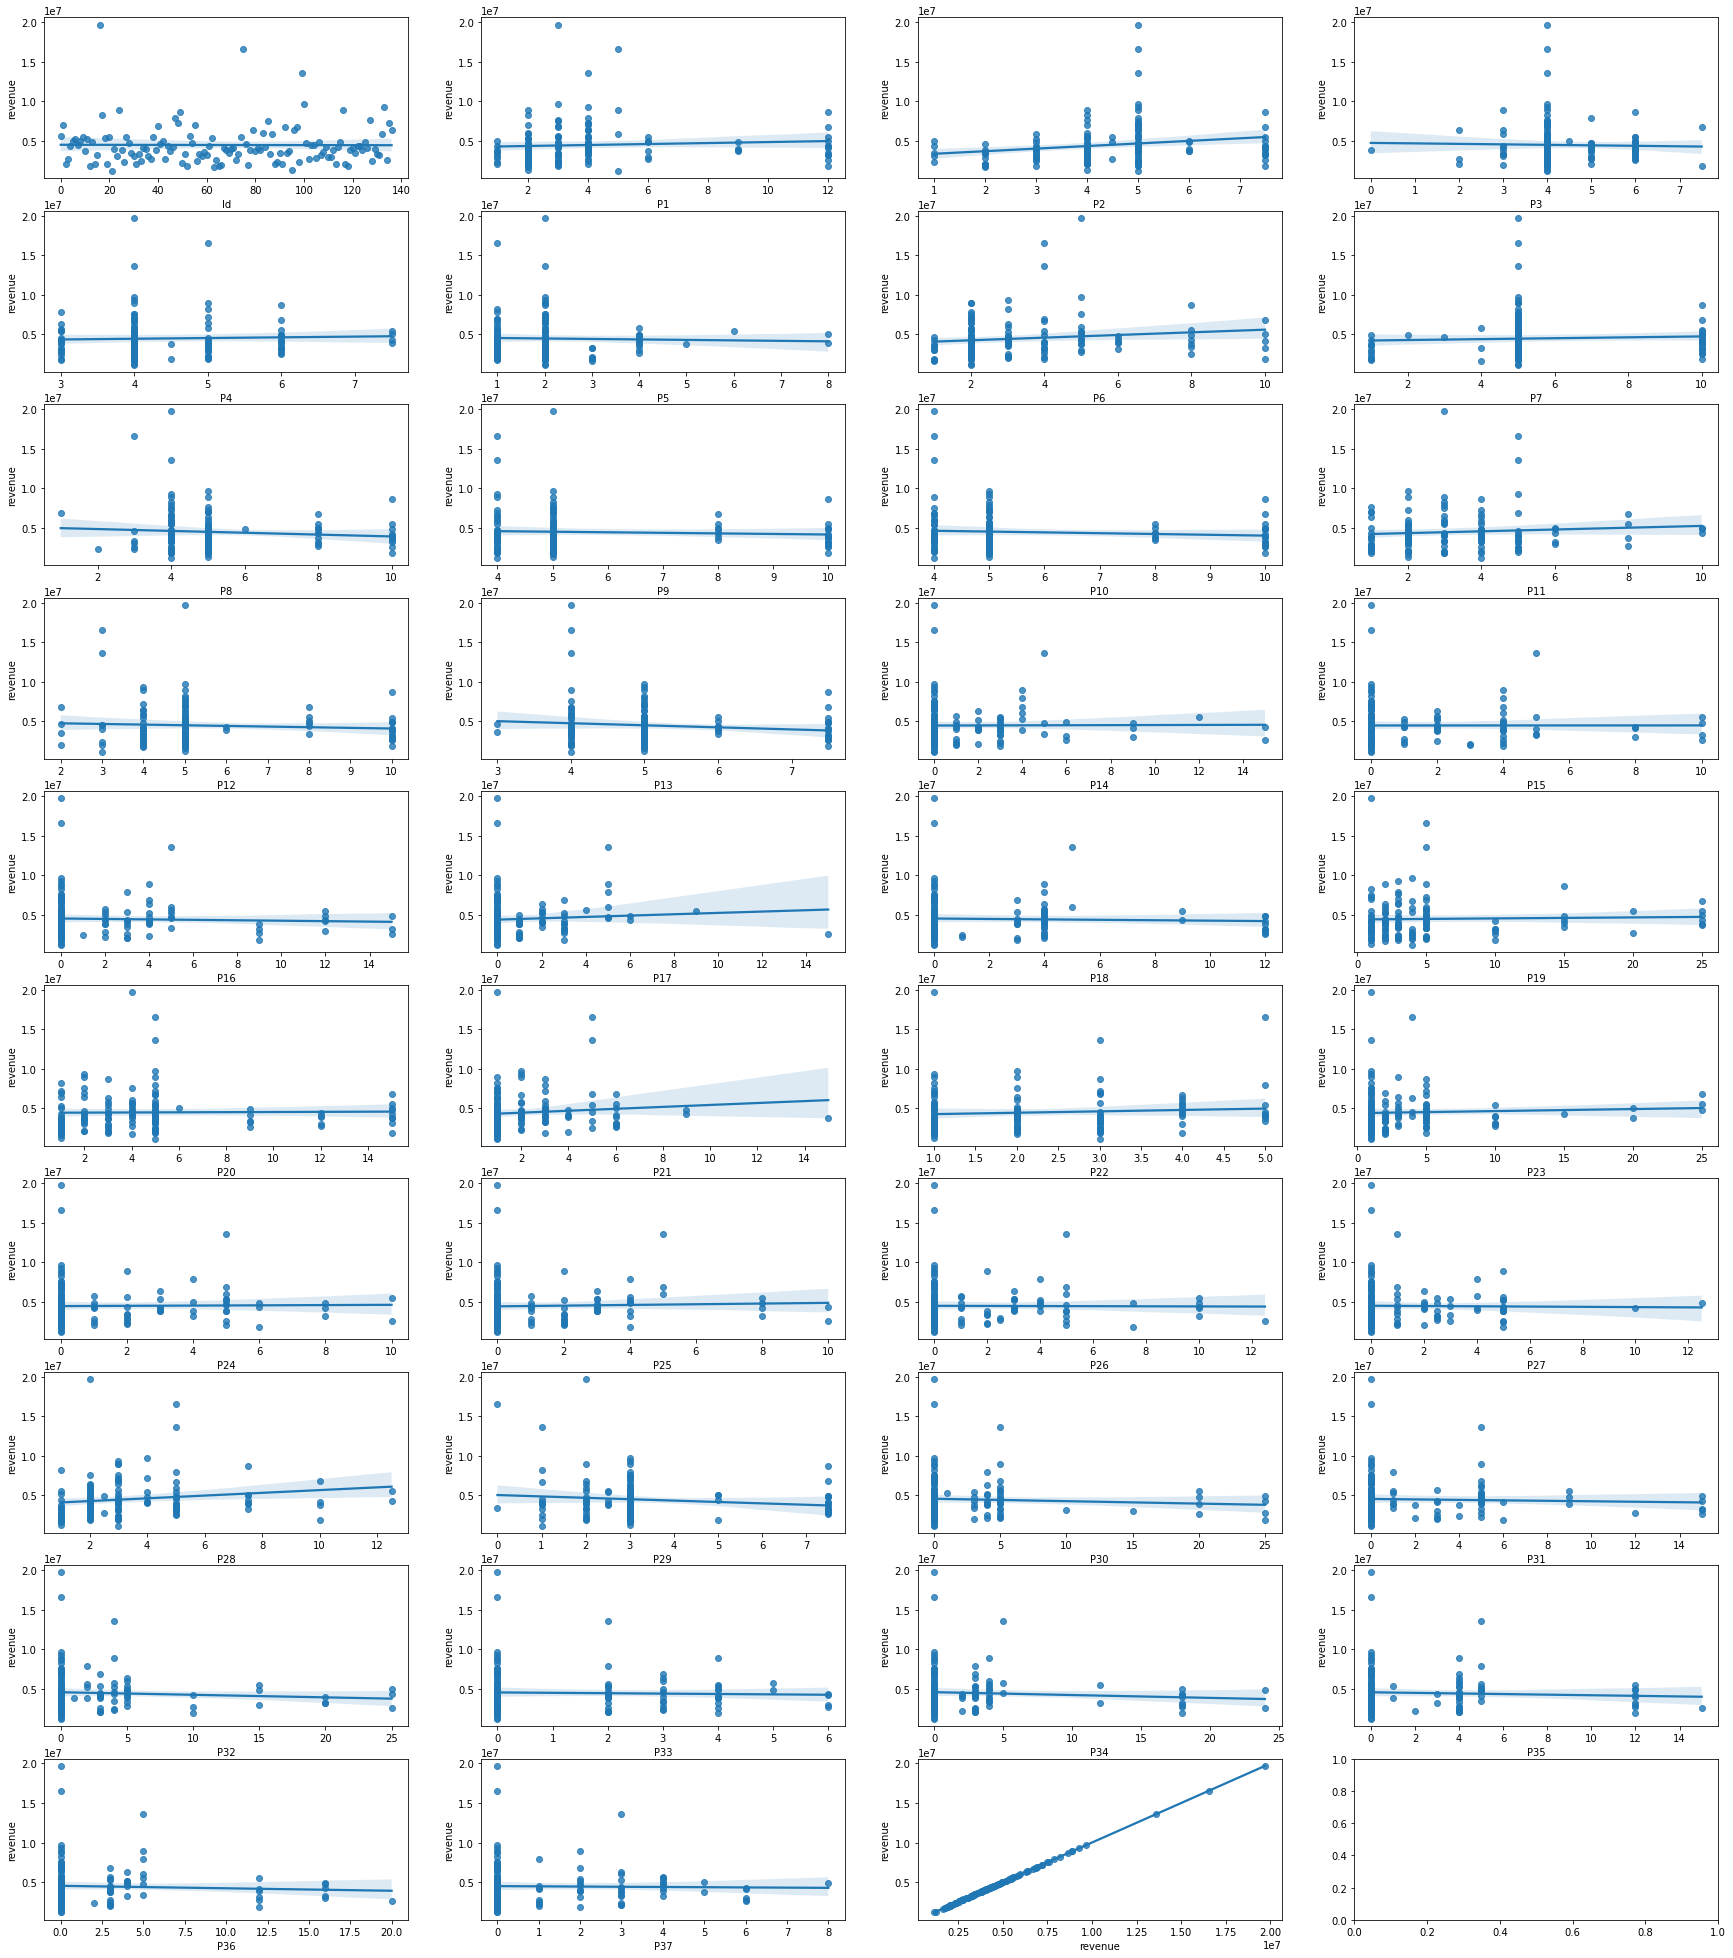

In [ ]:
fig, ax = plt.subplots(10, 4, figsize=(30, 35))
for variable, subplot in zip(numerical_features, ax.flatten()):
    sns.regplot(x=df[variable], y=df['revenue'], ax=subplot)

As the graphs above show, there is no obvious linear relationship between these numberical variables and revenue.

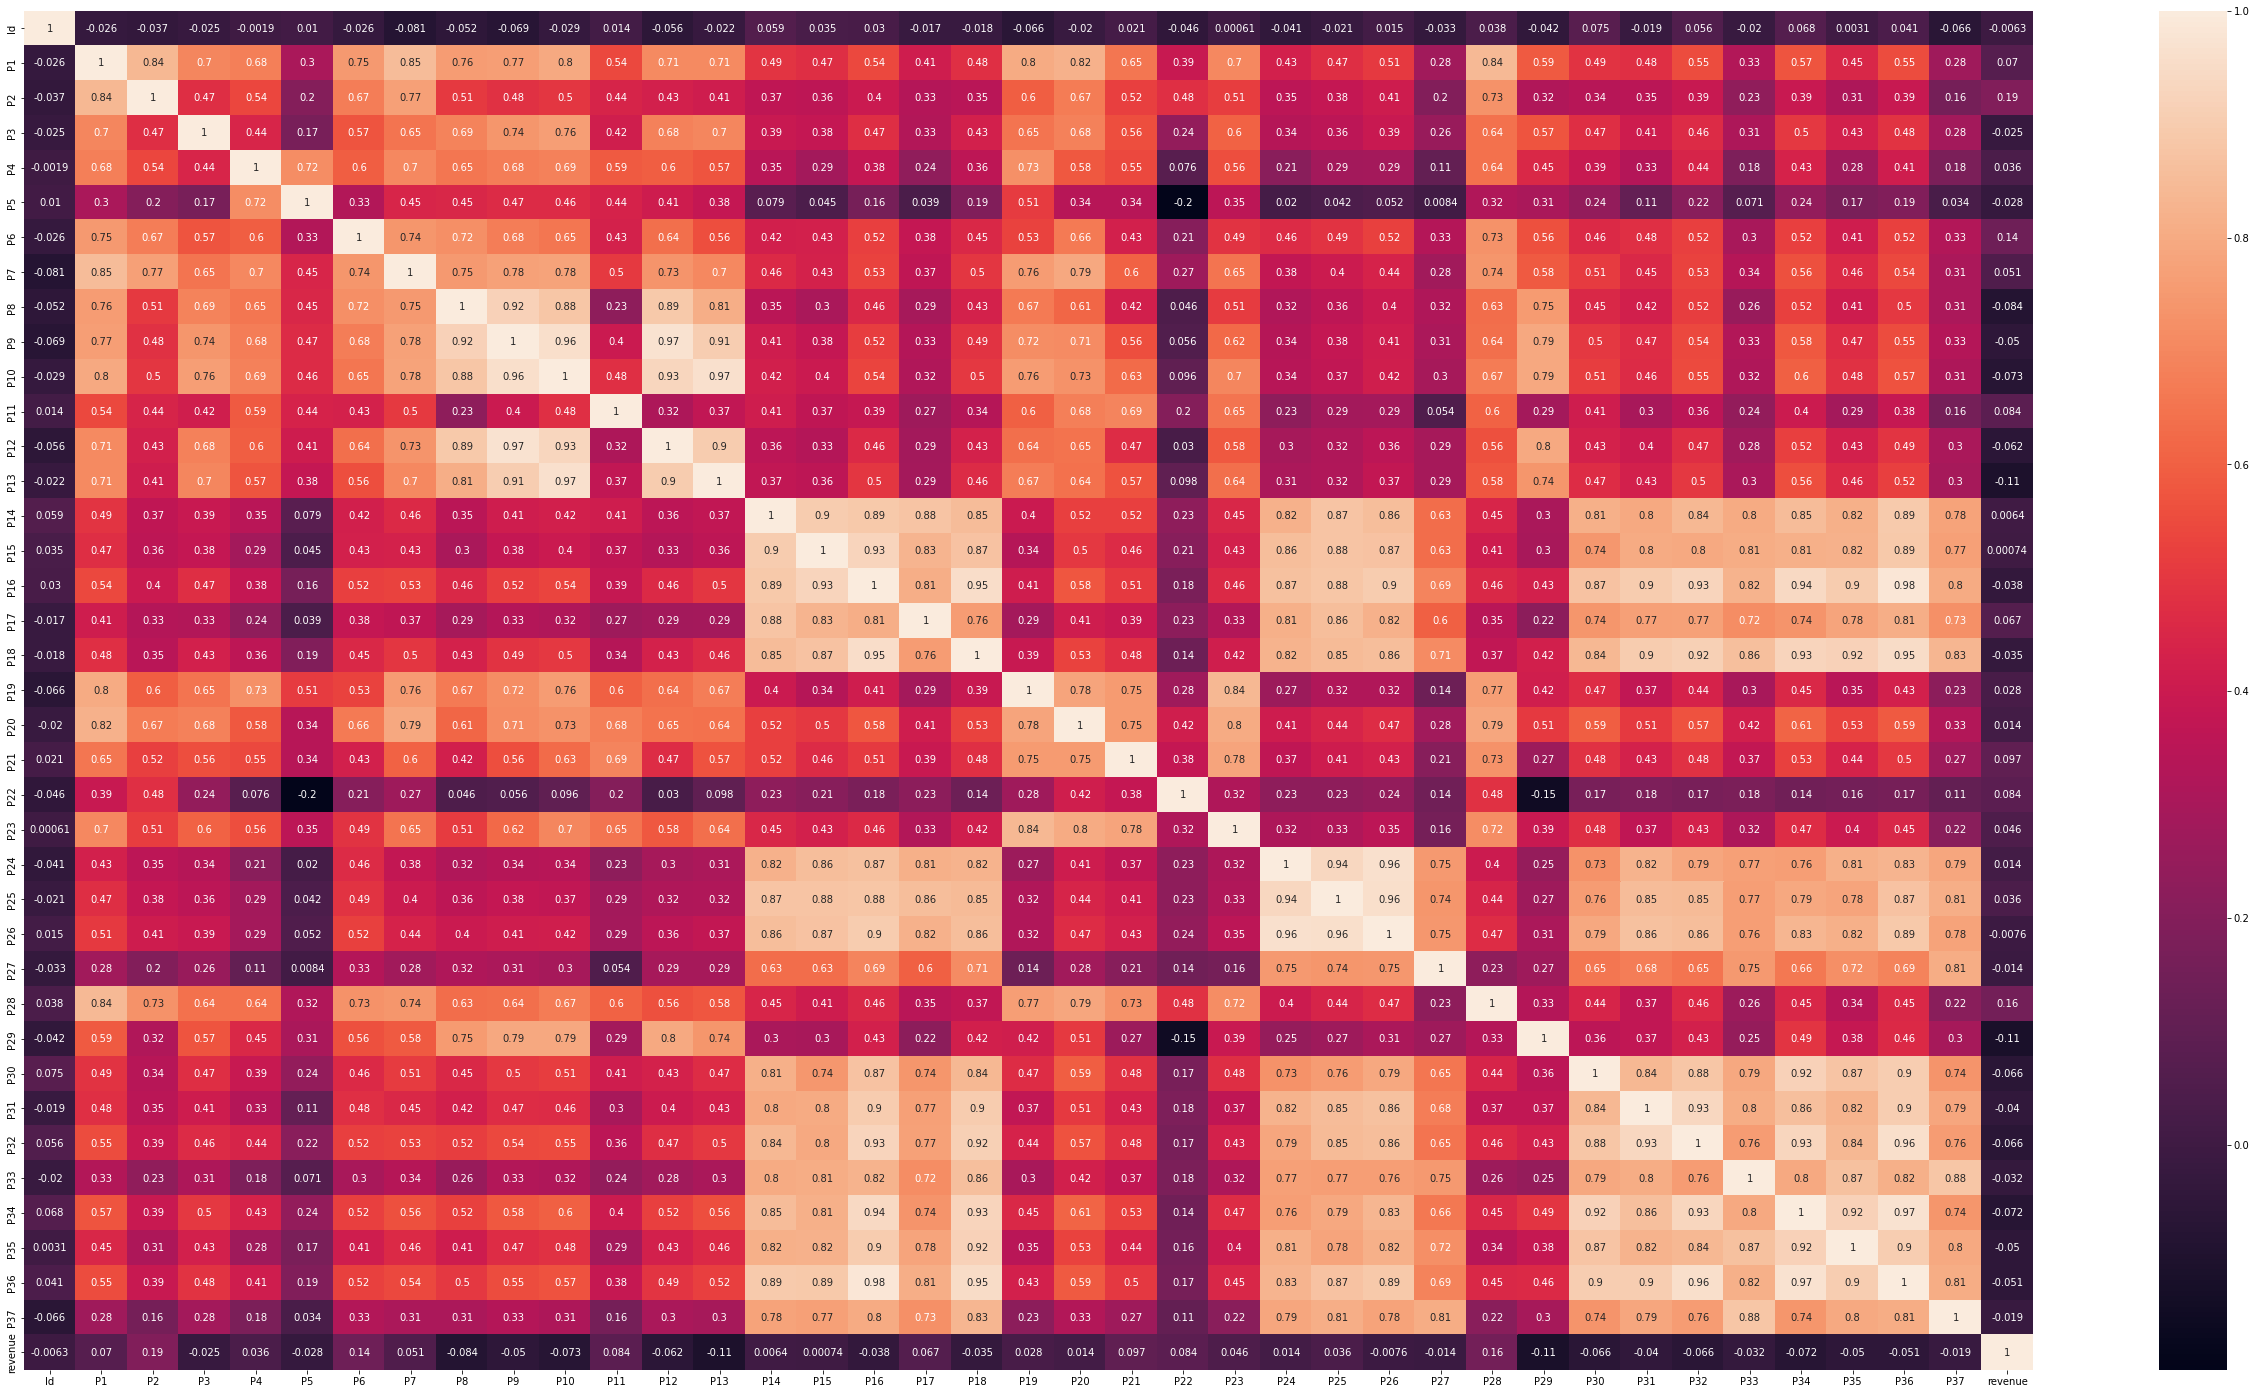

In [ ]:
plt.figure(figsize=(45,25))
sns.heatmap(df.corr(),annot=True)

There is no significant correlation within numerical variables.

###Categorical data distribution

In [ ]:
city_count = df.pivot_table(columns = ['City'], aggfunc = 'size')
print(city_count)

City
Adana              3
Afyonkarahisar     1
Amasya             1
Ankara            19
Antalya            4
Aydın              2
Balıkesir          1
Bolu               1
Bursa              5
Denizli            1
Diyarbakır         3
Edirne             1
Elazığ             1
Eskişehir          3
Gaziantep          1
Isparta            1
Karabük            1
Kastamonu          1
Kayseri            3
Kocaeli            1
Konya              2
Kütahya            1
Kırklareli         1
Muğla              2
Osmaniye           1
Sakarya            4
Samsun             5
Tekirdağ           3
Tokat              1
Trabzon            2
Uşak               1
İstanbul          50
İzmir              9
Şanlıurfa          1
dtype: int64


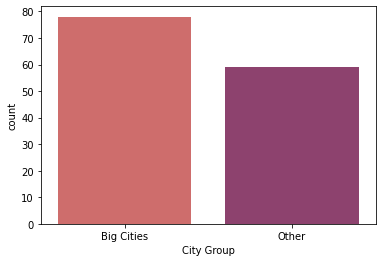

In [ ]:
sns.countplot(data=df, x="City Group", palette="flare")

The big cities exactly include Ankara, Istanbul and Izmir so we may remove City later.

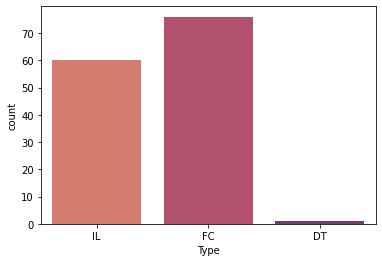

In [ ]:
sns.countplot(data=df, x="Type", palette="flare")

There is only one restaurant whose type is DT and we may negelect it later.

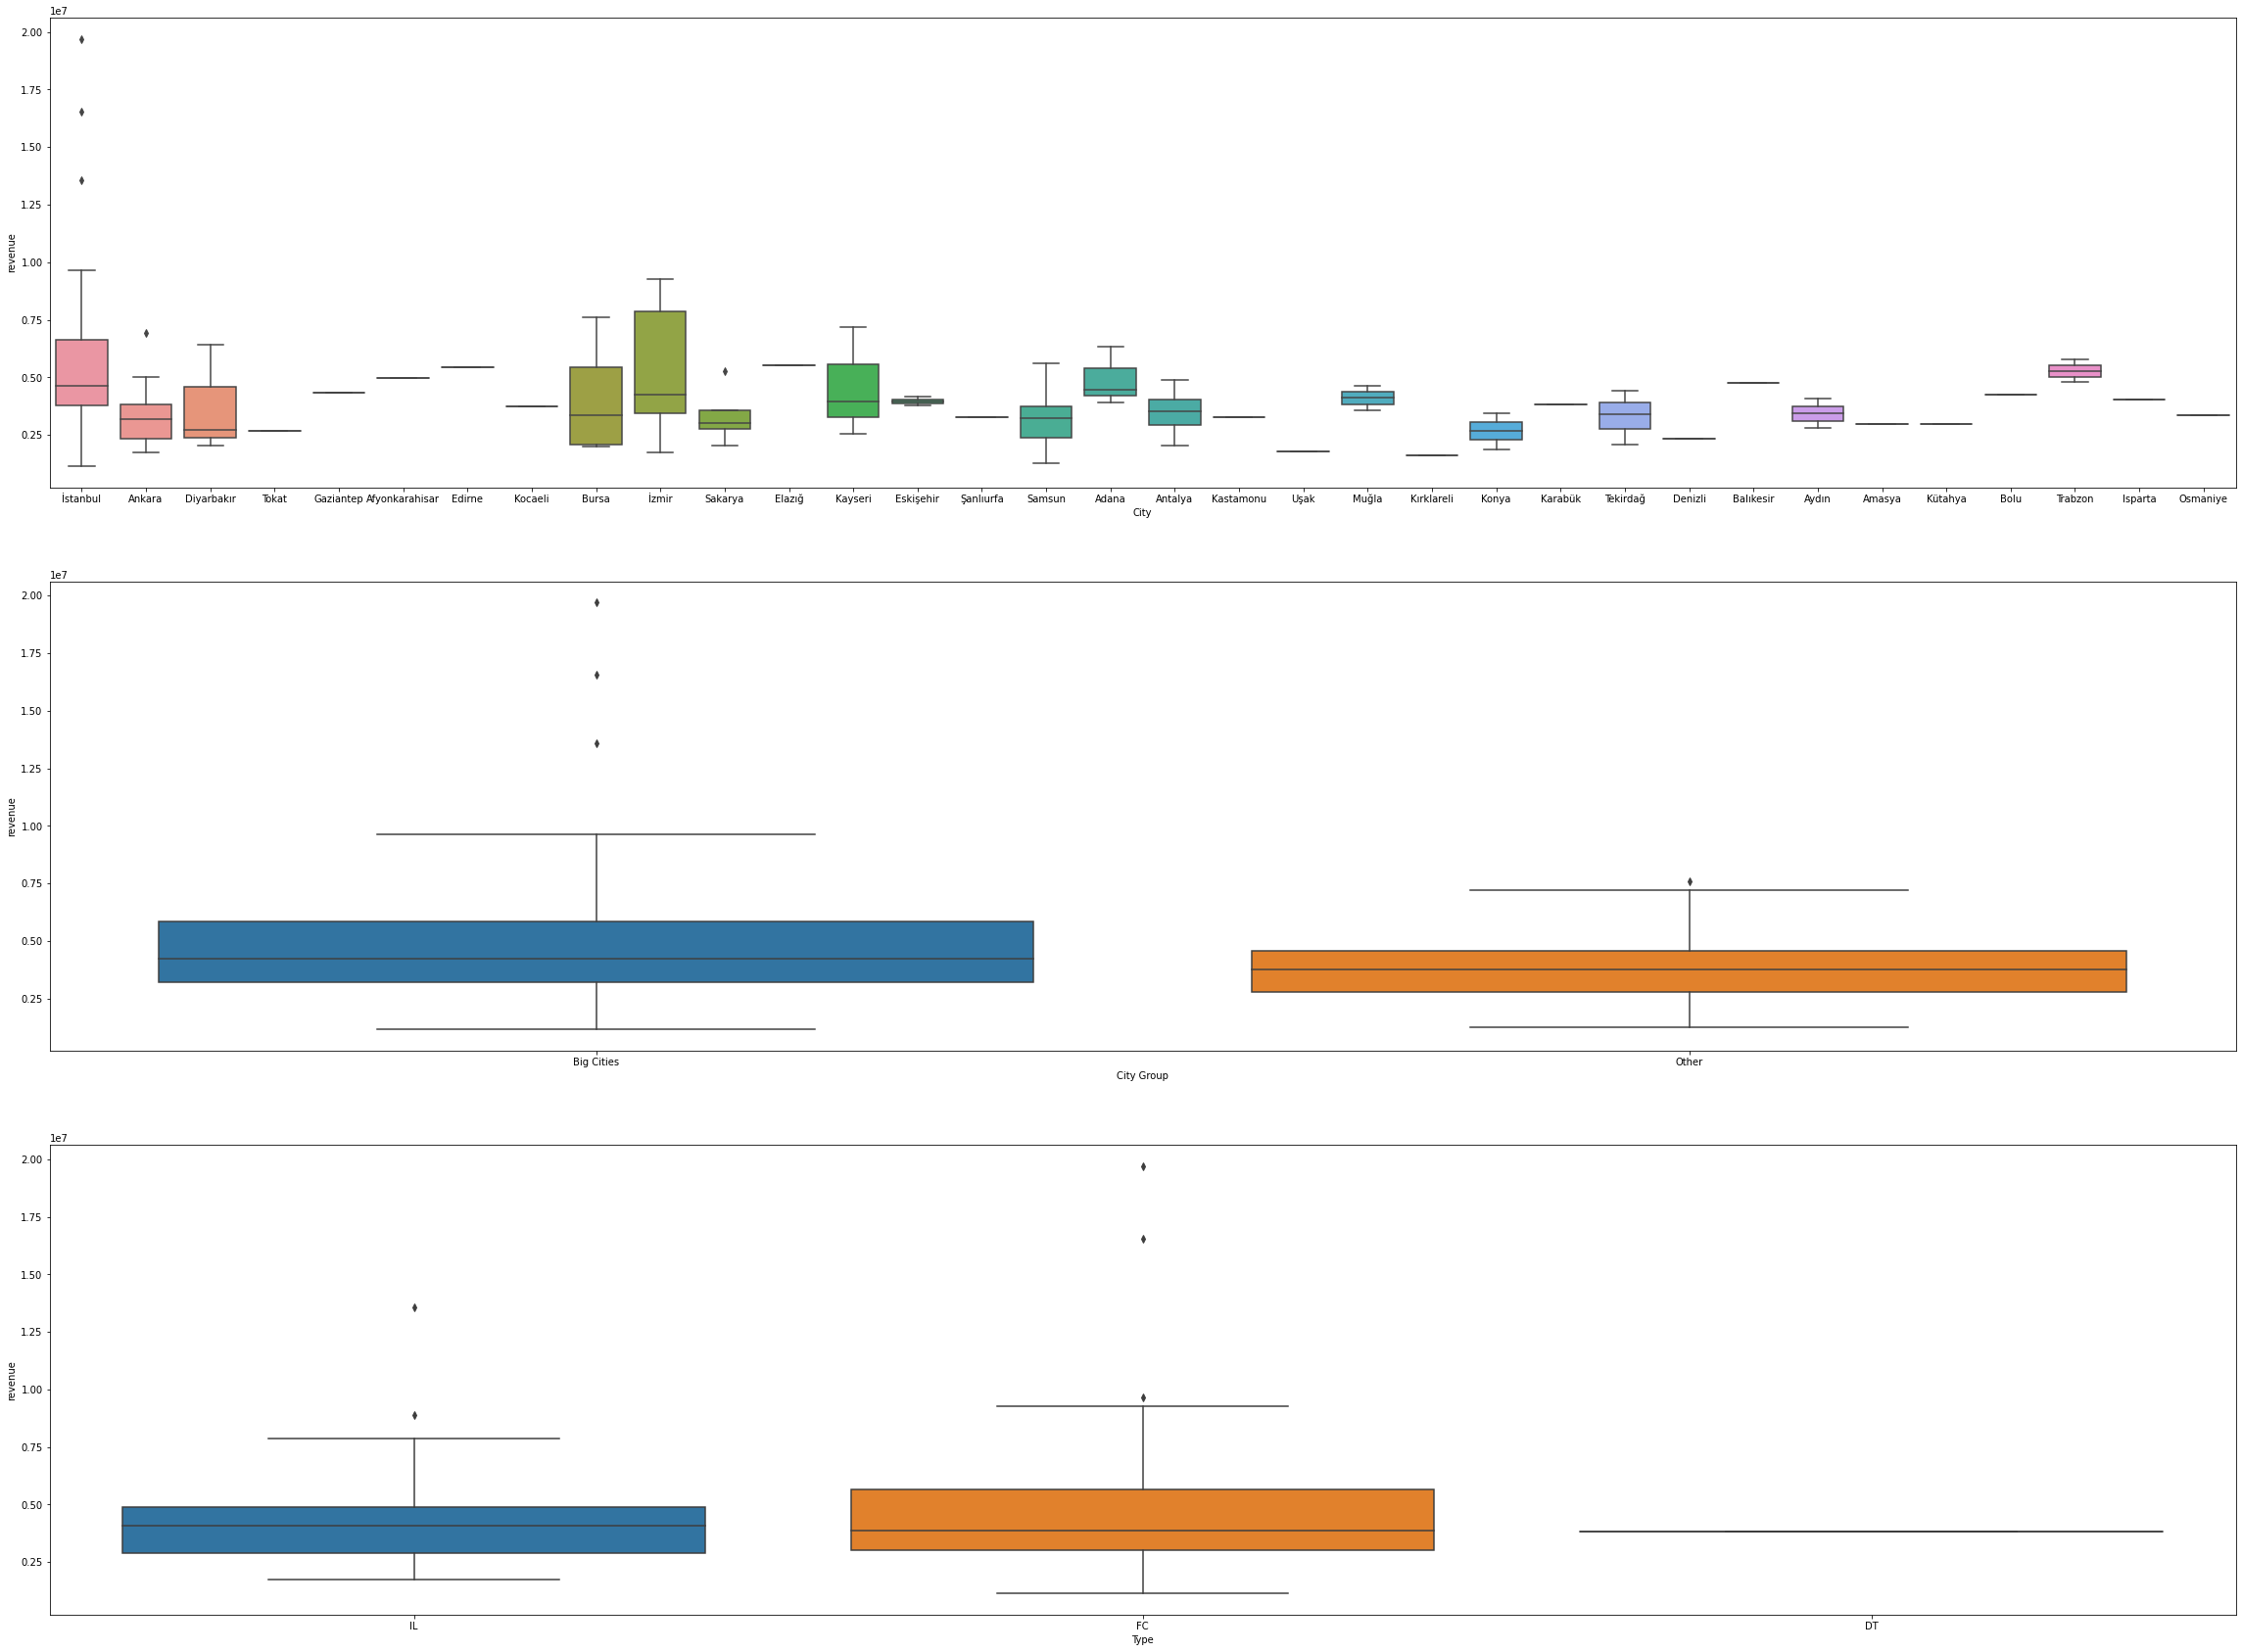

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(40, 30))
for var, subplot in zip(categorical_features, ax.flatten()):
    sns.boxplot(x=var, y='revenue', data=df, ax=subplot)

## Feature Engineering

In [ ]:
#Get the number of days open for each restaurant
df.insert(0, 'Current Date', '2022/01/02')
df['Current Date'] = df['Current Date'].apply(pd.to_datetime)
df['days since open'] = (df['Current Date'] - df['Open Date']).dt.days

In [ ]:
df

,Current Date,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,days since open
0,2022-01-02,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,...,5,3,4,5,5,4,3,4,5653753.0,8205
1,2022-01-02,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,...,0,0,0,0,0,0,0,0,6923131.0,5071
2,2022-01-02,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,...,0,0,0,0,0,0,0,0,2055379.0,3221
3,2022-01-02,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,...,25,12,10,6,18,12,12,6,2675511.0,3622
4,2022-01-02,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,...,5,1,3,2,3,4,3,3,4316715.0,4621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2022-01-02,132,2008-06-25,Trabzon,Other,FC,2,3.0,3.0,5.0,...,0,0,0,0,0,0,0,0,5787594.0,4939
133,2022-01-02,133,2006-10-12,İzmir,Big Cities,FC,4,5.0,4.0,4.0,...,0,0,0,0,0,0,0,0,9262754.0,5561
134,2022-01-02,134,2006-07-08,Kayseri,Other,FC,3,4.0,4.0,4.0,...,0,0,0,0,0,0,0,0,2544857.0,5657
135,2022-01-02,135,2010-10-29,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,...,0,0,0,0,0,0,0,0,7217634.0,4083


### Create dummy variables

In [ ]:
# Create dummy variables for Big Cities
df['Big Cities'] = 0
df.loc[df['City Group'] == 'Big Cities', 'Big Cities'] = 1
# Drop orginal City Groups
df = df.drop(['City Group'], axis = 1)

In [ ]:
df

,Current Date,Id,Open Date,City,Type,P1,P2,P3,P4,P5,...,P31,P32,P33,P34,P35,P36,P37,revenue,days since open,Big Cities
0,2022-01-02,0,1999-07-17,İstanbul,IL,4,5.0,4.0,4.0,2,...,3,4,5,5,4,3,4,5653753.0,8205,1
1,2022-01-02,1,2008-02-14,Ankara,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,6923131.0,5071,1
2,2022-01-02,2,2013-03-09,Diyarbakır,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,2055379.0,3221,0
3,2022-01-02,3,2012-02-02,Tokat,IL,6,4.5,6.0,6.0,4,...,12,10,6,18,12,12,6,2675511.0,3622,0
4,2022-01-02,4,2009-05-09,Gaziantep,IL,3,4.0,3.0,4.0,2,...,1,3,2,3,4,3,3,4316715.0,4621,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2022-01-02,132,2008-06-25,Trabzon,FC,2,3.0,3.0,5.0,4,...,0,0,0,0,0,0,0,5787594.0,4939,0
133,2022-01-02,133,2006-10-12,İzmir,FC,4,5.0,4.0,4.0,2,...,0,0,0,0,0,0,0,9262754.0,5561,1
134,2022-01-02,134,2006-07-08,Kayseri,FC,3,4.0,4.0,4.0,2,...,0,0,0,0,0,0,0,2544857.0,5657,0
135,2022-01-02,135,2010-10-29,İstanbul,FC,4,5.0,4.0,5.0,2,...,0,0,0,0,0,0,0,7217634.0,4083,1


As we can see from the graph above, Food Court tend to have the most counts, and Drive Thru has the least. We will create a new dummy variable for Food Court.

In [ ]:
# Create dummy variables for food courts
df['Food Court'] = 0
df.loc[df['Type'] == 'FC', 'Food Court'] = 1
# Drop orginal Type Column
df = df.drop(['Type'], axis = 1)

In [ ]:
df

,Current Date,Id,Open Date,City,P1,P2,P3,P4,P5,P6,...,P32,P33,P34,P35,P36,P37,revenue,days since open,Big Cities,Food Court
0,2022-01-02,0,1999-07-17,İstanbul,4,5.0,4.0,4.0,2,2,...,4,5,5,4,3,4,5653753.0,8205,1,0
1,2022-01-02,1,2008-02-14,Ankara,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,0,6923131.0,5071,1,1
2,2022-01-02,2,2013-03-09,Diyarbakır,2,4.0,2.0,5.0,2,3,...,0,0,0,0,0,0,2055379.0,3221,0,0
3,2022-01-02,3,2012-02-02,Tokat,6,4.5,6.0,6.0,4,4,...,10,6,18,12,12,6,2675511.0,3622,0,0
4,2022-01-02,4,2009-05-09,Gaziantep,3,4.0,3.0,4.0,2,2,...,3,2,3,4,3,3,4316715.0,4621,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2022-01-02,132,2008-06-25,Trabzon,2,3.0,3.0,5.0,4,2,...,0,0,0,0,0,0,5787594.0,4939,0,1
133,2022-01-02,133,2006-10-12,İzmir,4,5.0,4.0,4.0,2,3,...,0,0,0,0,0,0,9262754.0,5561,1,1
134,2022-01-02,134,2006-07-08,Kayseri,3,4.0,4.0,4.0,2,3,...,0,0,0,0,0,0,2544857.0,5657,0,1
135,2022-01-02,135,2010-10-29,İstanbul,4,5.0,4.0,5.0,2,2,...,0,0,0,0,0,0,7217634.0,4083,1,1


### Remove outliers

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

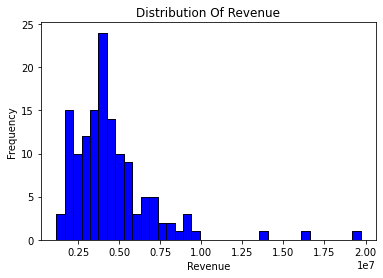

In [ ]:
# matplotlib histogram
plt.hist(df['revenue'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(df['revenue'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution Of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

In [ ]:
out_liers = df[df['revenue'] > 12500000]
out_liers

,Current Date,Id,Open Date,City,P1,P2,P3,P4,P5,P6,...,P32,P33,P34,P35,P36,P37,revenue,days since open,Big Cities,Food Court
16,2022-01-02,16,2000-01-07,İstanbul,3,5.0,4.0,4.0,2,5,...,0,0,0,0,0,0,19696939.0,8031,1,1
75,2022-01-02,75,2005-10-15,İstanbul,5,5.0,4.0,5.0,1,4,...,0,0,0,0,0,0,16549064.0,5923,1,1
99,2022-01-02,99,1999-12-18,İstanbul,4,5.0,4.0,4.0,2,4,...,4,2,5,5,5,3,13575224.0,8051,1,0


As we can see the distribution of of variable revenue is right skewed, and there are three outliers. By finding the outliers we can see that all of these three data point are from Istanbul city, since there are plenty of datapoints for the city Istanbul (50), removing these three outliers will not harm our prediction to the restaurant revenue in city Istanbul.

### Log transformation

In [ ]:
df = df.drop(df.index[[16,75,99]])

In [ ]:
df['log(revenue)'] = np.log(df['revenue'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

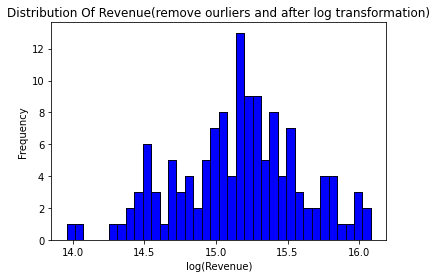

In [ ]:
# matplotlib histogram
plt.hist(df['log(revenue)'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(df['log(revenue)'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution Of Revenue(remove ourliers and after log transformation)')
plt.xlabel('log(Revenue)')
plt.ylabel('Frequency')

In [ ]:
out_liers = df[df['log(revenue)'] < 14.2]
out_liers

,Current Date,Id,Open Date,City,P1,P2,P3,P4,P5,P6,...,P33,P34,P35,P36,P37,revenue,days since open,Big Cities,Food Court,log(revenue)
21,2022-01-02,21,2014-01-25,İstanbul,5,5.0,4.0,4.0,2,2,...,0,0,0,0,0,1149870.0,2899,1,1,13.955159
95,2022-01-02,95,2012-06-08,Samsun,2,4.0,4.0,4.0,2,2,...,0,0,0,0,0,1270499.0,3495,0,1,14.054920


As we can see, two new outliers occured after we did log transformation for variable revenue. The city for these two outliers are Istanbul and Samsun. We will remove both of these two outliers since there are still enough data for our to do predictions. After removing these two outliers, city Istanbul will have 46 rows, and city Samsun will have 4 rows. Which should be enough for our further analysis. 

### Remove outliers again

In [ ]:
df = df.loc[df['log(revenue)'] > 14.2]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

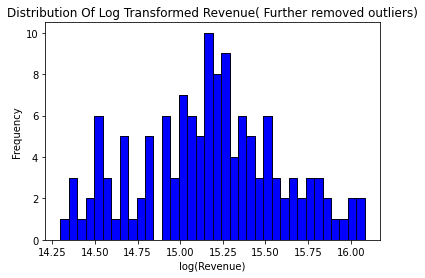

In [ ]:
# matplotlib histogram
plt.hist(df['log(revenue)'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(df['log(revenue)'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution Of Log Transformed Revenue( Further removed outliers)')
plt.xlabel('log(Revenue)')
plt.ylabel('Frequency')

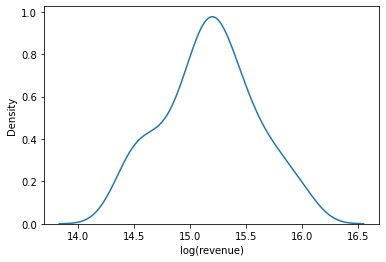

In [ ]:
sns.kdeplot(data = df, x = 'log(revenue)')

### Remove columns 


In [ ]:
# Drop first 4 columns
df = df.drop(df.columns[0:4], axis = 1)

In [ ]:
df.columns

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21',
       'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue', 'days since open',
       'Big Cities', 'Food Court', 'log(revenue)'],
      dtype='object')

In this step, we dropped 'current date', 'Open Date', 'ID' and 'City'. Since we have created a new date variable which is days sicne open, so we will not need the original open date variable anymore. ID will not have any influences to our data, so we will just remove it from the dataframe. At the last, variable City may cause some overfitting issues, since there are many cities only countains one to two rows in our dataframe. As alternatives City group will be used in our training datasets. 

#Model building

In [ ]:
# Get our labels
Y_log = df['log(revenue)']
Y = df['revenue']
# Get independent variables
X = df.drop(columns = ['log(revenue)','revenue'])

In [ ]:
scaler = StandardScaler().fit(X) 
X = scaler.transform(X)

In [ ]:
# Set test size to 0.2, so we will have enough data for training
X_train, X_test, y_train, y_test = train_test_split(X, Y_log, test_size = 0.2, random_state = 42)

We decided to split our test and training datasets into 80% of training and 20% of testing, due to the limitation of datasets(Only 137 rows in the datasets and after we removed outliers it became even smaller). In this case we can preserve the majority of our data into training which will make a better fit with any models. 

## Ridge Regression

In [ ]:
model_comparison = {}

In [ ]:
# define model
model = Ridge(alpha=0.5)
model.fit(X_train,y_train)
pred_y = model.predict(X_test)
MSE = np.square(np.subtract(y_test,pred_y)).mean() 
RMSE = math.sqrt(MSE)

model_comparison['Ridge'] = [RMSE]

print("Root Mean Square Error:",RMSE)
print("Root Mean Square Error:",np.e**RMSE)

Root Mean Square Error: 0.6080705285850614
Root Mean Square Error: 1.8368837626384098


## Lasso Regression

In [ ]:
model = Lasso(alpha = 0.5)
model.fit(X_train,y_train)
pred_y = model.predict(X_test)
MSE = np.square(np.subtract(y_test,pred_y)).mean() 
RMSE = math.sqrt(MSE)

corr_matrix = np.corrcoef(y_test,pred_y)
corr = corr_matrix[0,1]
R_sq = corr**2

model_comparison['Lasso'] = [RMSE]

print("log_Root Mean Square Error:",RMSE)
print("Root Mean Square Error:",np.e**RMSE)

log_Root Mean Square Error: 0.3961947105216228
Root Mean Square Error: 1.4861586601093795


## KNN regressor


In [ ]:
for i in range(1, 31):
  model = KNeighborsRegressor(n_neighbors=i)
  model.fit(X_train,y_train)
  pred_y = model.predict(X_test)
  MSE = np.square(np.subtract(y_test,pred_y)).mean() 
  RMSE = math.sqrt(MSE)
  print(i, RMSE)

RMSE = 0.3310797700103611
model_comparison['KNN'] = [RMSE]

print("Root Mean Square Error:",RMSE)
print("Root Mean Square Error:",np.e**RMSE)

1 0.4247380958169785
2 0.37744286319538933
3 0.38127281532030527
4 0.35340739676122634
5 0.3263910917521966
6 0.33700827364146635
7 0.34322483844181917
8 0.31268978557165983
9 0.3310797700103611
10 0.32434459987671616
11 0.32013734444089914
12 0.3308573968370971
13 0.3374505879446867
14 0.33826007461159113
15 0.34992312249282603
16 0.3455441127050112
17 0.3474682607927871
18 0.3507218127465861
19 0.3488411202505727
20 0.35163094176726306
21 0.3487654723070182
22 0.3490531250780103
23 0.3422507382124339
24 0.3432871929920236
25 0.3444108777746945
26 0.3482748774352407
27 0.35229164459893436
28 0.3518777147411727
29 0.3590282630052227
30 0.3578688430291454
Root Mean Square Error: 0.3310797700103611
Root Mean Square Error: 1.3924708652933406


From the above, we could know the best estimator n_neighbors is 8 and the minimal RMSE is 0.3310797700103611.

## SVR

In [ ]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
pred_y = regressor.predict(X_test)
MSE = np.square(np.subtract(y_test,pred_y)).mean() 
RMSE = math.sqrt(MSE)

model_comparison['SVR'] = [RMSE]

print("Root Mean Square Error:",RMSE)
print("Root Mean Square Error:",np.e**RMSE)

Root Mean Square Error: 0.3356645951901077
Root Mean Square Error: 1.3988697584728316


## Random Forests Regressor

#### Base-model

Here, we build the Random Forest Regressor model with default parameter of n_estimators = 10. So, We have used 10 decision-trees to build the model. 

In [ ]:
model_base = RandomForestRegressor(random_state=42)
model_base.fit(X_train, y_train)

pred_y = model_base.predict(X_test)

MSE = np.square(np.subtract(y_test,pred_y)).mean() 
RMSE = math.sqrt(MSE)

model_comparison['RandomForest'] = [RMSE]

print("Root Mean Square Error:",RMSE)
print("Root Mean Square Error:",np.e**RMSE)

Root Mean Square Error: 0.3451117456497894
Root Mean Square Error: 1.4121477122148796


#### Hyper-parameter tuning

In [ ]:
param_grid_simple = { 'n_estimators': [*range(50,600,50)]
                     , 'max_depth': [*range(0,20,1)]
                     , "min_samples_leaf": [*np.arange(2,5,10)]
                    }

In [ ]:
model = RandomForestRegressor(random_state=42)
search = GridSearchCV(estimator=model
                     ,param_grid=param_grid_simple
                     ,scoring = "neg_mean_squared_error"
                     ,cv = 5
                     ,n_jobs=-1)

In [ ]:
search.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


55 fits failed out of a total of 1100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py"

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [2],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550]},
             scoring='neg_mean_squared_error')

In [ ]:
search.best_estimator_

RandomForestRegressor(max_depth=2, min_samples_leaf=2, n_estimators=300,
                      random_state=42)

In [ ]:
abs(search.best_score_)**0.5

0.3878114862879656

In [ ]:
model_search = search.best_estimator_.fit(X_train,y_train)
pred_y = search.best_estimator_.predict(X_test)
MSE = np.square(np.subtract(y_test,pred_y)).mean() 
RMSE = math.sqrt(MSE)

print("Root Mean Square Error:",RMSE)
print("Root Mean Square Error:",np.e**RMSE)

Root Mean Square Error: 0.3775813535108696
Root Mean Square Error: 1.4587521135730874


In [ ]:
model = RandomForestRegressor(n_estimators = 600, random_state = 0, max_depth = 1, min_samples_leaf = 2)

model.fit(X_train, y_train)

pred_y = model.predict(X_test)

MSE = np.square(np.subtract(y_test,pred_y)).mean() 
RMSE = math.sqrt(MSE)

print("Root Mean Square Error:",RMSE)
print("Root Mean Square Error:",np.e**RMSE)

Root Mean Square Error: 0.38573998411567584
Root Mean Square Error: 1.4707022151575733


####  Feature importance

The feature importance in the random forest represents the sum of the Gini impurity reduction of all nodes split on that feature. We can use it to try to figure out which predictive variables random Forest thinks are the most important.

In [ ]:
i = [37,41]
col = df.drop(df.columns[i], axis = 1)

In [ ]:
col.columns

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21',
       'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'days since open',
       'Big Cities', 'Food Court'],
      dtype='object')

In [ ]:
feature_scores = pd.Series(model_base.feature_importances_, index=col.columns).sort_values(ascending=False)

feature_scores

days since open    0.266758
P28                0.111440
P11                0.043828
P17                0.041260
P1                 0.040840
P22                0.037188
P29                0.035089
P21                0.034824
P2                 0.034552
P6                 0.030250
P20                0.026808
P3                 0.025544
P4                 0.024791
P19                0.024470
P8                 0.021027
P5                 0.020345
P30                0.019232
Big Cities         0.017413
P23                0.015868
P25                0.013618
P12                0.011598
Food Court         0.010068
P37                0.009665
P14                0.009148
P26                0.009064
P32                0.007591
P9                 0.006583
P36                0.005526
P18                0.005292
P16                0.005146
P13                0.005115
P24                0.005058
P10                0.003873
P31                0.003673
P7                 0.003529
P33                0

40 features with reduction of 0.00%


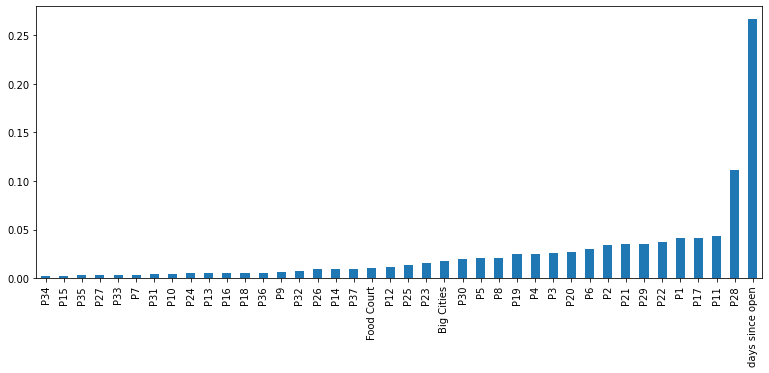

In [ ]:
n_features = (feature_scores>0).sum()
print(f'{n_features} features with reduction of {(1-n_features/len(feature_scores))*100:2.2f}%')
feature_scores.sort_values().plot(kind = 'bar', figsize = (13,5));

The above plot shows that the most important feature is days since open, second important feature is P28 and least important feature is P34.

## XGBoost

#### Base-model

In [ ]:
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

pred_y = xgb.predict(X_test)

MSE = np.square(np.subtract(y_test,pred_y)).mean() 
RMSE = math.sqrt(MSE)

print("Root Mean Square Error:",RMSE)
print("Root Mean Square Error:",np.e**RMSE)

[23:36:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Square Error: 0.3776185835762194
Root Mean Square Error: 1.4588064240205896


#### Hyper-parameter tuning

We select some parameters that have a great impact on the model, including some parameters that prevent the model from overfitting, for model tuning.

In [ ]:
params_xgb = {
    'learning_rate': [.1, .5, .7, .9, .95, .99, 1],
    'colsample_bytree': [.3, .4, .5, .6],
    'max_depth': [4],
    'alpha': [3],
    'subsample': [.5],
    'n_estimators': [30, 70, 100, 200]
}

In [ ]:
model = XGBRegressor(random_state=42)
search = GridSearchCV(estimator=model
                     ,param_grid=params_xgb
                     ,scoring = "neg_mean_squared_error"
                     ,cv = 5
                     ,n_jobs=-1)

In [ ]:
search.fit(X_train, y_train)

[21:00:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=XGBRegressor(random_state=42), n_jobs=-1,
             param_grid={'alpha': [3], 'colsample_bytree': [0.3, 0.4, 0.5, 0.6],
                         'learning_rate': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
                         'max_depth': [4], 'n_estimators': [30, 70, 100, 200],
                         'subsample': [0.5]},
             scoring='neg_mean_squared_error')

In [ ]:
search.best_estimator_

XGBRegressor(alpha=3, colsample_bytree=0.6, max_depth=4, n_estimators=70,
             random_state=42, subsample=0.5)

In [ ]:
abs(search.best_score_)**0.5

0.3978705843101068

In [ ]:
search.best_estimator_.fit(X_train,y_train)
pred_y = search.best_estimator_.predict(X_test)
MSE = np.square(np.subtract(y_test,pred_y)).mean() 
RMSE = math.sqrt(MSE)

model_comparison['XGBoost tune'] = [RMSE]

print("Root Mean Square Error:",RMSE)
print("Root Mean Square Error:",np.e**RMSE)

[23:28:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Square Error: 0.3660785509060014
Root Mean Square Error: 1.4420685139939649


It turns out that the hyper-parameter tuning model have a better performance than the baseline model.

#### Feature Importance

Now we use the tuning XGBoosting model to get feature importance, relevant features can be selected based on its score.

In [ ]:
feature_scores = pd.Series(search.best_estimator_.feature_importances_, index=col.columns).sort_values(ascending=False)
feature_scores

P35                0.058532
P13                0.047038
P32                0.040763
P28                0.038541
days since open    0.038002
P34                0.037065
P24                0.036516
P25                0.036303
P23                0.036093
P30                0.035447
Food Court         0.030350
P21                0.029844
P8                 0.029803
P17                0.029263
P26                0.026430
P36                0.026032
P27                0.025821
P9                 0.025569
P12                0.025402
Big Cities         0.023330
P29                0.023244
P18                0.023086
P16                0.021841
P22                0.021748
P37                0.021518
P11                0.020182
P20                0.020159
P5                 0.020113
P19                0.018822
P33                0.018687
P4                 0.016061
P6                 0.015655
P14                0.013257
P31                0.013222
P15                0.012209
P3                 0

40 features with reduction of 0.00%


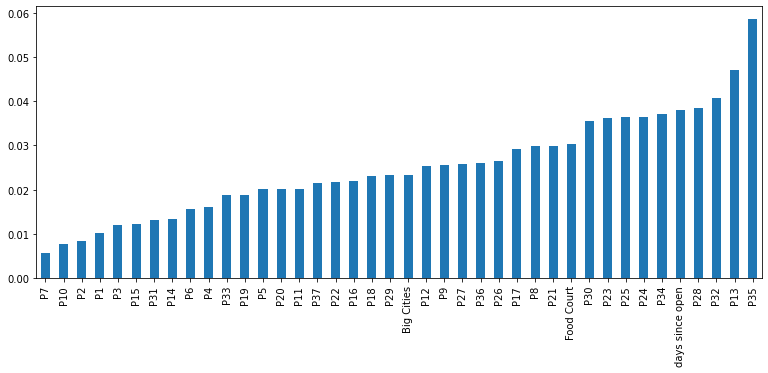

In [ ]:
n_features = (feature_scores>0).sum()
print(f'{n_features} features with reduction of {(1-n_features/len(feature_scores))*100:2.2f}%')
feature_scores.sort_values().plot(kind = 'bar', figsize = (13,5));

##Gradient Boosting

In [ ]:
# Try baseline model

model = GradientBoostingRegressor(random_state=0)
model.fit(X_train, y_train)
pred_y = model.predict(X_test)

MSE = np.square(np.subtract(y_test,pred_y)).mean() 
RMSE = math.sqrt(MSE)



print("Root Mean Square Error:",RMSE)
print("Root Mean Square Error:",np.e**RMSE)

Root Mean Square Error: 0.38012993952009266
Root Mean Square Error: 1.4624746103373596


In [ ]:
# Hyperparameter tuning 
# N-estimator

for i in range(1,300):
    model = GradientBoostingRegressor(n_estimators = i, random_state=0)
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)

    MSE = np.square(np.subtract(y_test,pred_y)).mean() 
    RMSE = math.sqrt(MSE)
    print(f'When n_estimators is {i}, Root Mean Square Error is {RMSE}')

When n_estimators is 1, Root Mean Square Error is 0.3931561991326801
When n_estimators is 2, Root Mean Square Error is 0.39120818759151055
When n_estimators is 3, Root Mean Square Error is 0.3913031235602885
When n_estimators is 4, Root Mean Square Error is 0.3897361817262351
When n_estimators is 5, Root Mean Square Error is 0.3951243719489509
When n_estimators is 6, Root Mean Square Error is 0.3940021290163886
When n_estimators is 7, Root Mean Square Error is 0.3941363059177371
When n_estimators is 8, Root Mean Square Error is 0.3964600777593111
When n_estimators is 9, Root Mean Square Error is 0.39664941705329715
When n_estimators is 10, Root Mean Square Error is 0.3951034034592541
When n_estimators is 11, Root Mean Square Error is 0.39157000043873635
When n_estimators is 12, Root Mean Square Error is 0.39433100018487155
When n_estimators is 13, Root Mean Square Error is 0.39333603159359304
When n_estimators is 14, Root Mean Square Error is 0.38752233201256386
When n_estimators is 15

In [ ]:
# criterion
s = {'friedman_mse', 'squared_error', 'mse'}

for i in s:
    model = GradientBoostingRegressor(n_estimators = 59, random_state=0, criterion = i)
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)

    MSE = np.square(np.subtract(y_test,pred_y)).mean() 
    RMSE = math.sqrt(MSE)
    print(f'When criterion is {i}, Root Mean Square Error is {RMSE}')

When criterion is friedman_mse, Root Mean Square Error is 0.37260939671383736
When criterion is squared_error, Root Mean Square Error is 0.37260939671383736
When criterion is mse, Root Mean Square Error is 0.37260939671383736


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:471: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed i

In [ ]:
# min_samples_split
for i in range(2, 300):
    model = GradientBoostingRegressor(n_estimators = 59, random_state=0, min_samples_split=i)
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)

    MSE = np.square(np.subtract(y_test,pred_y)).mean() 
    RMSE = math.sqrt(MSE)
    print(f'When min_sample_spit is {i}, Root Mean Square Error is {RMSE}')

When min_sample_spit is 2, Root Mean Square Error is 0.37260939671383736
When min_sample_spit is 3, Root Mean Square Error is 0.3748369916416141
When min_sample_spit is 4, Root Mean Square Error is 0.3776984675484625
When min_sample_spit is 5, Root Mean Square Error is 0.38127320294628575
When min_sample_spit is 6, Root Mean Square Error is 0.3811808738149308
When min_sample_spit is 7, Root Mean Square Error is 0.38948165159923565
When min_sample_spit is 8, Root Mean Square Error is 0.4050212881530638
When min_sample_spit is 9, Root Mean Square Error is 0.4137875625584662
When min_sample_spit is 10, Root Mean Square Error is 0.4165313493413564
When min_sample_spit is 11, Root Mean Square Error is 0.4165313493413564
When min_sample_spit is 12, Root Mean Square Error is 0.41811549353610067
When min_sample_spit is 13, Root Mean Square Error is 0.3973101907766857
When min_sample_spit is 14, Root Mean Square Error is 0.38997843999612936
When min_sample_spit is 15, Root Mean Square Error is 

In [ ]:
# min_samples_leaf
for i in linspace(0.1, 0.5, num=5):
    model = GradientBoostingRegressor(n_estimators = 59, random_state=0, min_samples_split=2,min_samples_leaf=i)
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)

    MSE = np.square(np.subtract(y_test,pred_y)).mean() 
    RMSE = math.sqrt(MSE)
    print(f'When min_samples_leaf is {i}, Root Mean Square Error is {RMSE}')

When min_samples_leaf is 0.1, Root Mean Square Error is 0.370276895228234
When min_samples_leaf is 0.2, Root Mean Square Error is 0.3470283258361815
When min_samples_leaf is 0.30000000000000004, Root Mean Square Error is 0.35904460847702396
When min_samples_leaf is 0.4, Root Mean Square Error is 0.3624920365959138
When min_samples_leaf is 0.5, Root Mean Square Error is 0.3961947105216228


In [ ]:
# min_samples_leaf
for i in range(1, 300):
    model = GradientBoostingRegressor(n_estimators = 59, random_state=0, min_samples_split=2,min_samples_leaf=i)
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)

    MSE = np.square(np.subtract(y_test,pred_y)).mean() 
    RMSE = math.sqrt(MSE)
    print(f'When min_samples_leaf is {i}, Root Mean Square Error is {RMSE}')

When min_samples_leaf is 1, Root Mean Square Error is 0.37260939671383736
When min_samples_leaf is 2, Root Mean Square Error is 0.3922836171107318
When min_samples_leaf is 3, Root Mean Square Error is 0.370904812781109
When min_samples_leaf is 4, Root Mean Square Error is 0.3975969549364514
When min_samples_leaf is 5, Root Mean Square Error is 0.40645568000433246
When min_samples_leaf is 6, Root Mean Square Error is 0.4013428104963634
When min_samples_leaf is 7, Root Mean Square Error is 0.41551610303998554
When min_samples_leaf is 8, Root Mean Square Error is 0.3960655516597014
When min_samples_leaf is 9, Root Mean Square Error is 0.38749433631835173
When min_samples_leaf is 10, Root Mean Square Error is 0.3733418266985813
When min_samples_leaf is 11, Root Mean Square Error is 0.370276895228234
When min_samples_leaf is 12, Root Mean Square Error is 0.3584303088265767
When min_samples_leaf is 13, Root Mean Square Error is 0.38280863669401033
When min_samples_leaf is 14, Root Mean Squar

In [ ]:
# subsample
for i in linspace(0.1, 1, num=10):
    model = GradientBoostingRegressor(n_estimators = 59, random_state=0, min_samples_split=2,min_samples_leaf=23,subsample=i)
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)

    MSE = np.square(np.subtract(y_test,pred_y)).mean() 
    RMSE = math.sqrt(MSE)
    print(f'When subsample is {i}, Root Mean Square Error is {RMSE}')

When subsample is 0.1, Root Mean Square Error is 0.3956954132633526
When subsample is 0.2, Root Mean Square Error is 0.39806035134141265
When subsample is 0.30000000000000004, Root Mean Square Error is 0.40082566794004604
When subsample is 0.4, Root Mean Square Error is 0.3991483246154896
When subsample is 0.5, Root Mean Square Error is 0.37145950420245594
When subsample is 0.6, Root Mean Square Error is 0.36626189689959426
When subsample is 0.7000000000000001, Root Mean Square Error is 0.3453172571433547
When subsample is 0.8, Root Mean Square Error is 0.3408479901950342
When subsample is 0.9, Root Mean Square Error is 0.34400084422590715
When subsample is 1.0, Root Mean Square Error is 0.33424384389610096


In [ ]:
# min_weight_fraction_leaf
for i in linspace(0.1, 0.5, num=5):
    model = GradientBoostingRegressor(n_estimators = 59, random_state=0, min_samples_split=2,min_samples_leaf=23,subsample=1,min_weight_fraction_leaf=i)
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)

    MSE = np.square(np.subtract(y_test,pred_y)).mean() 
    RMSE = math.sqrt(MSE)
    print(f'When min_weight_fraction_leaf is {i}, Root Mean Square Error is {RMSE}')

When min_weight_fraction_leaf is 0.1, Root Mean Square Error is 0.33424384389610096
When min_weight_fraction_leaf is 0.2, Root Mean Square Error is 0.33424384389610096
When min_weight_fraction_leaf is 0.30000000000000004, Root Mean Square Error is 0.35904460847702396
When min_weight_fraction_leaf is 0.4, Root Mean Square Error is 0.3624920365959138
When min_weight_fraction_leaf is 0.5, Root Mean Square Error is 0.3961947105216228


In [ ]:
# max_depth
for i in range(1, 300):
    model = GradientBoostingRegressor(n_estimators = 59, random_state=0, min_samples_split=2,min_samples_leaf=23,subsample=1,min_weight_fraction_leaf=0,max_depth=i)
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)

    MSE = np.square(np.subtract(y_test,pred_y)).mean() 
    RMSE = math.sqrt(MSE)
    print(f'When max_depth is {i}, Root Mean Square Error is {RMSE}')

When max_depth is 1, Root Mean Square Error is 0.3663210562300656
When max_depth is 2, Root Mean Square Error is 0.33627639576381857
When max_depth is 3, Root Mean Square Error is 0.33424384389610096
When max_depth is 4, Root Mean Square Error is 0.33424384389610096
When max_depth is 5, Root Mean Square Error is 0.33424384389610096
When max_depth is 6, Root Mean Square Error is 0.33424384389610096
When max_depth is 7, Root Mean Square Error is 0.33424384389610096
When max_depth is 8, Root Mean Square Error is 0.33424384389610096
When max_depth is 9, Root Mean Square Error is 0.33424384389610096
When max_depth is 10, Root Mean Square Error is 0.33424384389610096
When max_depth is 11, Root Mean Square Error is 0.33424384389610096
When max_depth is 12, Root Mean Square Error is 0.33424384389610096
When max_depth is 13, Root Mean Square Error is 0.33424384389610096
When max_depth is 14, Root Mean Square Error is 0.33424384389610096
When max_depth is 15, Root Mean Square Error is 0.33424384

In [ ]:
# min_impurity_decrease
for i in range(0, 300):
    model = GradientBoostingRegressor(n_estimators = 59, random_state=0, min_samples_split=2,min_samples_leaf=23,subsample=1,min_weight_fraction_leaf=0,max_depth=3,
                                      min_impurity_decrease=i)
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)

    MSE = np.square(np.subtract(y_test,pred_y)).mean() 
    RMSE = math.sqrt(MSE)
    print(f'When min_impurity_decrease is {i}, Root Mean Square Error is {RMSE}')

When min_impurity_decrease is 0, Root Mean Square Error is 0.33424384389610096
When min_impurity_decrease is 1, Root Mean Square Error is 0.3816896022899103
When min_impurity_decrease is 2, Root Mean Square Error is 0.3938269241894013
When min_impurity_decrease is 3, Root Mean Square Error is 0.3961947105216228
When min_impurity_decrease is 4, Root Mean Square Error is 0.3961947105216228
When min_impurity_decrease is 5, Root Mean Square Error is 0.3961947105216228
When min_impurity_decrease is 6, Root Mean Square Error is 0.3961947105216228
When min_impurity_decrease is 7, Root Mean Square Error is 0.3961947105216228
When min_impurity_decrease is 8, Root Mean Square Error is 0.3961947105216228
When min_impurity_decrease is 9, Root Mean Square Error is 0.3961947105216228
When min_impurity_decrease is 10, Root Mean Square Error is 0.3961947105216228
When min_impurity_decrease is 11, Root Mean Square Error is 0.3961947105216228
When min_impurity_decrease is 12, Root Mean Square Error is 0

In [ ]:
# n_estimators
for i in range(1, 300):
    model = GradientBoostingRegressor(n_estimators = i, random_state=0, min_samples_split=2,min_samples_leaf=23,subsample=1,min_weight_fraction_leaf=0,max_depth=3,
                                      min_impurity_decrease=0)
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)

    MSE = np.square(np.subtract(y_test,pred_y)).mean() 
    RMSE = math.sqrt(MSE)
    print(f'When n_estimatorse is {i}, Root Mean Square Error is {RMSE}')

When n_estimatorse is 1, Root Mean Square Error is 0.3907257006725645
When n_estimatorse is 2, Root Mean Square Error is 0.3862156354970876
When n_estimatorse is 3, Root Mean Square Error is 0.38250223614765055
When n_estimatorse is 4, Root Mean Square Error is 0.37792605014734454
When n_estimatorse is 5, Root Mean Square Error is 0.37509391157242394
When n_estimatorse is 6, Root Mean Square Error is 0.3735309400215918
When n_estimatorse is 7, Root Mean Square Error is 0.3700312521878083
When n_estimatorse is 8, Root Mean Square Error is 0.36898406494519126
When n_estimatorse is 9, Root Mean Square Error is 0.3665917102313391
When n_estimatorse is 10, Root Mean Square Error is 0.36254845323702095
When n_estimatorse is 11, Root Mean Square Error is 0.36207085708746706
When n_estimatorse is 12, Root Mean Square Error is 0.35881280950709604
When n_estimatorse is 13, Root Mean Square Error is 0.35912060884377933
When n_estimatorse is 14, Root Mean Square Error is 0.3565373003883534
When n_

In [ ]:
# random_state
for i in range(0, 300):
    model = GradientBoostingRegressor(n_estimators = 124, random_state=0, min_samples_split=2,min_samples_leaf=23,subsample=1,min_weight_fraction_leaf=0,max_depth=3,
                                      min_impurity_decrease=0)
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)

    MSE = np.square(np.subtract(y_test,pred_y)).mean() 
    RMSE = math.sqrt(MSE)
    print(f'When random_state is {i}, Root Mean Square Error is {RMSE}')

When random_state is 0, Root Mean Square Error is 0.33003408231245746
When random_state is 1, Root Mean Square Error is 0.33003408231245746
When random_state is 2, Root Mean Square Error is 0.33003408231245746
When random_state is 3, Root Mean Square Error is 0.33003408231245746
When random_state is 4, Root Mean Square Error is 0.33003408231245746
When random_state is 5, Root Mean Square Error is 0.33003408231245746
When random_state is 6, Root Mean Square Error is 0.33003408231245746
When random_state is 7, Root Mean Square Error is 0.33003408231245746
When random_state is 8, Root Mean Square Error is 0.33003408231245746
When random_state is 9, Root Mean Square Error is 0.33003408231245746
When random_state is 10, Root Mean Square Error is 0.33003408231245746
When random_state is 11, Root Mean Square Error is 0.33003408231245746
When random_state is 12, Root Mean Square Error is 0.33003408231245746
When random_state is 13, Root Mean Square Error is 0.33003408231245746
When random_stat

In [ ]:
# learning_rate
for i in linspace(0.1, 1, num=10):
    model = GradientBoostingRegressor(n_estimators = 124, random_state=0, min_samples_split=2,min_samples_leaf=23,subsample=1,min_weight_fraction_leaf=0,max_depth=3,
                                      min_impurity_decrease=0,learning_rate=i)
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)

    MSE = np.square(np.subtract(y_test,pred_y)).mean() 
    RMSE = math.sqrt(MSE)
    print(f'When learning_rate is {i}, Root Mean Square Error is {RMSE}')

When learning_rate is 0.1, Root Mean Square Error is 0.33003408231245746
When learning_rate is 0.2, Root Mean Square Error is 0.34595171256883256
When learning_rate is 0.30000000000000004, Root Mean Square Error is 0.3412987791849436
When learning_rate is 0.4, Root Mean Square Error is 0.3325630549037474
When learning_rate is 0.5, Root Mean Square Error is 0.38302575337660993
When learning_rate is 0.6, Root Mean Square Error is 0.3754053174194547
When learning_rate is 0.7000000000000001, Root Mean Square Error is 0.3601594941242221
When learning_rate is 0.8, Root Mean Square Error is 0.35059499228492946
When learning_rate is 0.9, Root Mean Square Error is 0.3587279844641294
When learning_rate is 1.0, Root Mean Square Error is 0.3852633066311621


In [ ]:
#Best Model
model = GradientBoostingRegressor(n_estimators = 124, random_state=0, min_samples_split=2,min_samples_leaf=23,subsample=1,min_weight_fraction_leaf=0,max_depth=3,
                                      min_impurity_decrease=0,learning_rate=0.1)
model.fit(X_train, y_train)
pred_y = model.predict(X_test)

MSE = np.square(np.subtract(y_test,pred_y)).mean() 
RMSE = math.sqrt(MSE)

model_comparison['Gradient Boosting tune'] = [RMSE]

print(f'Root Mean Square Error is {RMSE}')

Root Mean Square Error is 0.33003408231245746


##Method Comparison

In [ ]:
model_comparison_df = pd.DataFrame.from_dict(model_comparison).T
model_comparison_df.columns = ['RMSE Score']
model_comparison_df = model_comparison_df.sort_values('RMSE Score', ascending=True)
model_comparison_df.style.background_gradient(cmap='Blues')

,RMSE Score
Gradient Boosting tune,0.330034
KNN,0.331080
SVR,0.335665
RandomForest,0.345112
XGBoost tune,0.366079
Lasso,0.396195
Ridge,0.608071


In [ ]:
import plotly.graph_objects as go 
fig = go.Figure(data=[
    go.Bar(name='RMSE Score', y=model_comparison_df.index, x=model_comparison_df['RMSE Score'], orientation='h')
])
fig.update_layout(barmode='group')
fig.show()

Except Ridge Regression, all models have RMSE less than 0.4, and the difference among them is very small. Gradient Boosting has the best RMSE score 0.33. Gradient Boosting, KNN, and SVR have RMSE less than 0.34, which are three best models for our dataset. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

#Best Model
model = GradientBoostingRegressor(n_estimators = 124, random_state=0, min_samples_split=2,min_samples_leaf=23,subsample=1,min_weight_fraction_leaf=0,max_depth=3,
                                      min_impurity_decrease=0,learning_rate=0.1)
model.fit(X_train, y_train)
pred_y = model.predict(X_test)

MSE = np.square(np.subtract(y_test,pred_y)).mean() 
RMSE = math.sqrt(MSE)

model_comparison['Gradient Boosting tune'] = [RMSE]

print(f'Root Mean Square Error is {RMSE}')

Root Mean Square Error is 1592029.4901582315


#Conclusion

Boosting related algorithms tend to out performs linear regression related algorithms.Strong linear relationships might not be found in this datasets.
Gradient Boosts have more advantages learn complex non-linear decision boundaries via Boosting. SVR & KNN also have the feature of working better on non-linear relationships, which could be potentially have a higher score.
Since we log the dependent variable our RMSE now is unit free, it is hard for us to get the exact number of how much our model missed by the prediction, however we still able to see that which model predicts the resutls more accurately. In our best model, we have transform the unit into dollars and the result is $1592029.49 which is still a quite large number. Further reasoning for this result will be discussed in limitation section of the report. 



#Limitations

There are many limitations in this projects, as the most important the giving sample is not enough for us to make a more precised prediction. During the project, we found out that without setting a seed for train test split we will get different results each time, and the results varying in a large of scale. So, our current best model will only performs the best with a seed of 42. There are many unknown variables which forbidden us to do more feature engineerings, which could potentialy raise the performance of our model. 
Lastly, for the variable city, we have an unbalanced distribution of each city, there are 50 counts of Istanbul and some of the cities only have 1. This could also generates a large bias in prediction for the restaurants in these small cities.